# Loan book analysis

## Importing libraries and data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [2]:
df = pd.read_csv(r"C:\Users\gwachira002\Pictures\OAF\Exercise\analytics_specialist_hiring_dataset_final.csv",parse_dates = True)

1df.head()

#### Observations from imported data
- The start date, end date, next contract payment due date and birth date columns do not have a consoistent data type, some are date time while others are dates. These columns also have null values as well. 
- The gender column has the values as 0 and 1 and not male or female. 
- The region column is named l3_entity_id and is not a string

## Data cleaning

### Cleaning columns with dates

#### Changing start date, end date, next contract payment due date and birth date from date time to date

In [3]:
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['end_date'] = pd.to_datetime(df['end_date']).dt.date
df['next_contract_payment_due_date'] = pd.to_datetime(df['next_contract_payment_due_date']).dt.date
df['birthdate'] = pd.to_datetime(df['birthdate']).dt.date

In [4]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,0,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25,NaT,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,1,5073,Individual loan,0.754315
2,abc0003,Active,2022-05-31,NaT,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,1,5072,Individual loan,0.769648
3,abc0004,Active,2022-07-05,NaT,2022-08-18,4350.0,6142.35,10451.86,3000.0,NaT,1,5084,Individual loan,0.587680
4,abc0005,Active,2022-05-31,NaT,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,1,5074,Individual loan,0.753873


#### Replacing null values

##### Checking null value count for each column

In [5]:
df.isnull().sum()

contract_reference                   0
status                               0
start_date                           0
end_date                           754
next_contract_payment_due_date       0
cumulative_amount_paid               0
expected_cumulative_amount_paid      0
nominal_contract_value               0
deposit_amount                       0
birthdate                          142
gender                               0
l3_entity_id                         0
name                                 0
expected_payment_progression         0
dtype: int64

##### Replacing null values in end date column with ongoing

In [6]:
df["end_date"].fillna("Ongoing", inplace = True)

In [7]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,0,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,1,5073,Individual loan,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,1,5072,Individual loan,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,NaT,1,5084,Individual loan,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,1,5074,Individual loan,0.753873


##### Replacing null values in birth date column with zero

In [8]:
df["birthdate"].fillna("Unknown", inplace = True)

In [9]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,0,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,1,5073,Individual loan,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,1,5072,Individual loan,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,1,5084,Individual loan,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,1,5074,Individual loan,0.753873


#### Replacing 0 and 1 in gender column with female and male

In [10]:
#Rename male and female assuming 0 is female and 1 is male
df['gender'] = df['gender'].replace(0,'Female')
df['gender'] = df['gender'].replace(1,'Male')

In [11]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873


##### Cleaning the l3_entity_id column

###### Rename l3_entity_id column to region

In [12]:
df = df.rename(columns={'l3_entity_id': 'region'})

In [13]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873


###### Converting data type of region to string

In [14]:
df['region']=df.region.astype('str')

## Task 1 (Deriving the metrics)

### PAR(Portfolio at Risk) Status.

#### Difference between today's date and next contract payment due date

In [15]:
df['next_contract_payment_due_date'] = pd.to_datetime(df.next_contract_payment_due_date)

def calculate_days(date):
    today = pd.Timestamp('today')
    return (today - date)

df['days'] = df['next_contract_payment_due_date'].apply(lambda x: calculate_days(x)).dt.days

In [16]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124


#### Creating column with PAR status

In [17]:
def df_par(row):
    if (row['days'] > 90):
        return 'PAR90+'
    elif (row['days'] > 30):
        return 'PAR31-90'
    elif (row['days'] > 7):
        return 'PAR8-30'
    elif (row['days'] >= 0):
        return "PAR0-7"
    else :
        return "On Time"
df['par_status'] = df.apply(df_par, axis = 1)

In [18]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+


### Current collection rate

#### Creating column with current collection rate

In [19]:
df['current_collection_rate']=df['cumulative_amount_paid']/(df['expected_cumulative_amount_paid']-df['deposit_amount'])

In [20]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+,NaN
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935


#### Replacing null values with zero

In [21]:
df['current_collection_rate'].fillna(0, inplace = True)

In [22]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+,0.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935


### Creating total arrears for each client

In [23]:
df['total_arrears'] = df['expected_cumulative_amount_paid']-df['cumulative_amount_paid']

In [24]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+,0.000000,0.00
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68


### Payment progression per client

#### Creating column with payment progression per client

In [25]:
df['payment_progression'] = df['expected_cumulative_amount_paid']/df['nominal_contract_value']

In [26]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+,0.000000,0.00,NaN
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873


#### Replace null values with zero

In [27]:
df['payment_progression'].fillna(0, inplace = True)

In [28]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,1.000000,169,PAR90+,0.000000,0.00,0.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873


### Expected payment progression per client

#### Creating column with expected payment progression per client

In [29]:
df['expected_payment_progression'] = df['expected_cumulative_amount_paid']/df['nominal_contract_value']

In [30]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,NaN,169,PAR90+,0.000000,0.00,0.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873


#### #Replace null values with zero

In [31]:
df['expected_payment_progression'].fillna(0, inplace = True)

In [32]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,0.000000,169,PAR90+,0.000000,0.00,0.000000
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873


### Deriving loan type from ‘name’ column

#### Creating the loan type column

In [33]:
conditions = [df['name'].str.contains('Individual'),
              df['name'].str.contains('Group'),
              df['name'].str.contains('Cash')]

values = [
    'Individual Loan',
    'Group Loan',
    'Cash Loan'   
]

In [34]:
df['loan_type'] = np.select(conditions, values, default="Paygo Loan")

In [35]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression,loan_type
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,0.000000,169,PAR90+,0.000000,0.00,0.000000,Cash Loan
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315,Individual Loan
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648,Individual Loan
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680,Individual Loan
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873,Individual Loan


#### Dropping name column

In [36]:
df.drop(['name'], axis=1)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression,loan_type
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.00,0.00,0.00,0.0,2043-01-01,Female,5121,0.000000,169,PAR90+,0.000000,0.00,0.000000,Cash Loan
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.00,6164.16,8171.86,2000.0,2037-01-01,Male,5073,0.754315,66,PAR31-90,1.232181,1033.16,0.754315,Individual Loan
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.00,5273.52,6851.86,2000.0,2063-10-11,Male,5072,0.769648,106,PAR90+,0.946993,2173.52,0.769648,Individual Loan
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.00,6142.35,10451.86,3000.0,Unknown,Male,5084,0.587680,79,PAR31-90,1.384314,1792.35,0.587680,Individual Loan
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.00,7743.68,10271.86,2500.0,1998-10-05,Male,5074,0.753873,124,PAR90+,0.657935,4293.68,0.753873,Individual Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,abc0996,Completed,2022-02-22,2022-02-22,2022-02-22,0.00,0.00,0.00,0.0,2045-01-01,Female,5121,0.000000,256,PAR90+,0.000000,0.00,0.000000,Cash Loan
996,abc0997,Active,2022-04-06,Ongoing,2022-09-19,12066.00,12769.96,14056.31,5566.0,2054-10-02,Female,5121,0.908486,47,PAR31-90,1.674912,703.96,0.908486,Group Loan
997,abc0998,Active,2022-02-19,Ongoing,2022-07-21,8714.00,11054.14,11054.14,3314.0,2038-01-01,Female,5121,1.000000,107,PAR90+,1.125819,2340.14,1.000000,Group Loan
998,abc0999,Completed,2022-02-11,2022-09-07,2022-09-11,13489.14,13489.14,13489.14,4046.0,1984-05-05,Female,5121,1.000000,55,PAR31-90,1.428459,0.00,1.000000,Group Loan


In [37]:
df.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,region,name,expected_payment_progression,days,par_status,current_collection_rate,total_arrears,payment_progression,loan_type
0,abc0001,Completed,2022-05-20,2022-05-20,2022-05-20,0.0,0.00,0.00,0.0,2043-01-01,Female,5121,Cash Sales IPP,0.000000,169,PAR90+,0.000000,0.00,0.000000,Cash Loan
1,abc0002,Active,2022-05-25,Ongoing,2022-08-31,5131.0,6164.16,8171.86,2000.0,2037-01-01,Male,5073,Individual loan,0.754315,66,PAR31-90,1.232181,1033.16,0.754315,Individual Loan
2,abc0003,Active,2022-05-31,Ongoing,2022-07-22,3100.0,5273.52,6851.86,2000.0,2063-10-11,Male,5072,Individual loan,0.769648,106,PAR90+,0.946993,2173.52,0.769648,Individual Loan
3,abc0004,Active,2022-07-05,Ongoing,2022-08-18,4350.0,6142.35,10451.86,3000.0,Unknown,Male,5084,Individual loan,0.587680,79,PAR31-90,1.384314,1792.35,0.587680,Individual Loan
4,abc0005,Active,2022-05-31,Ongoing,2022-07-04,3450.0,7743.68,10271.86,2500.0,1998-10-05,Male,5074,Individual loan,0.753873,124,PAR90+,0.657935,4293.68,0.753873,Individual Loan


## Task 3 (Exploratory Data Analysis)

### Number of men v women

In [38]:
df.gender.value_counts()

Male      630
Female    370
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

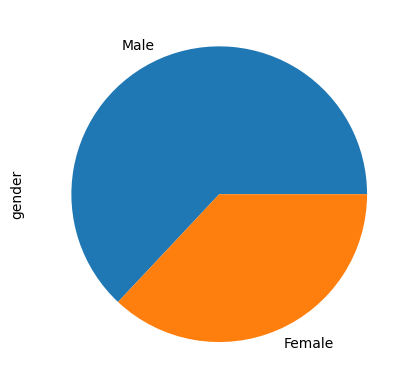

In [39]:
df.gender.value_counts().plot(kind = 'pie')

Most of the clients are men. Almost a third of the customers are women while two thirds are men. 

### Number of clients per region

In [40]:
df.region.value_counts()

5121    815
5083     41
5087     33
5084     29
5072     18
5073     16
5081     13
5078     13
5074     11
5076     11
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

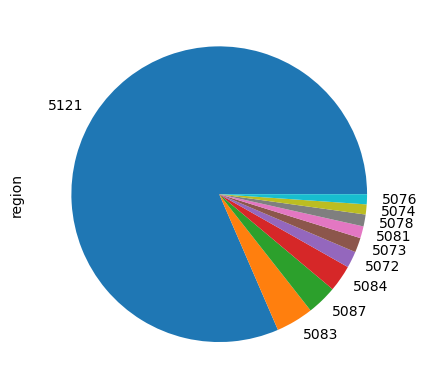

In [41]:
df.region.value_counts().plot(kind = 'pie')

Region 5121 has 80% of the OAF customers. 

### Number of loans by loan type

In [42]:
df.loan_type.value_counts()

Group Loan         563
Individual Loan    352
Cash Loan           84
Paygo Loan           1
Name: loan_type, dtype: int64

<AxesSubplot:ylabel='loan_type'>

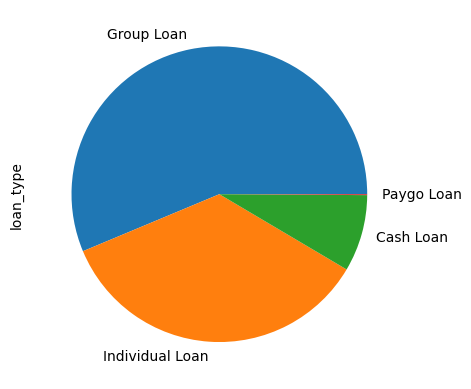

In [43]:
df.loan_type.value_counts().plot(kind = 'pie')

Group loans account for 56% of the total loans, individuals account for 35% of the loans while paygo and cash loans account for 0.85% of the loans. 

### Number of loans by PAR status

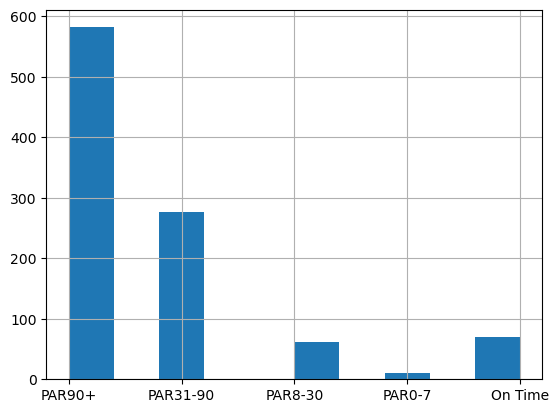

In [44]:
df.par_status.hist();

Around 55% of the loans are overdue for more than 90 days, around 28% of the loans are overdue for between 31 and 90 days while around 6% of the loans are on time. 

### Current collection rate by gender

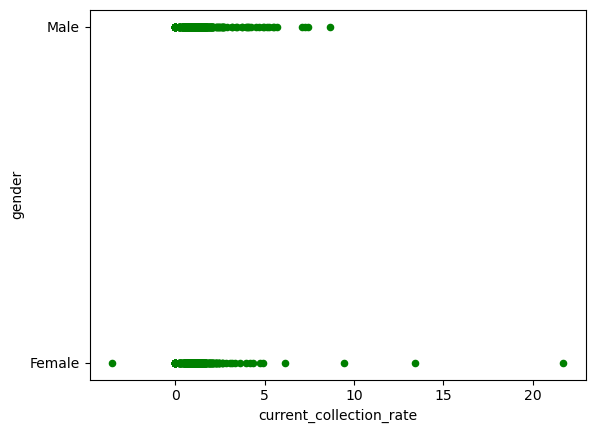

In [45]:
df.plot(x="current_collection_rate", y="gender", kind="scatter", c='green');

Majority of the clients have a collection rate of 0 to 5 days. 
Men have a collection rate of between 0 and 10 while women have a collection rate of 0 to 22 days. 

### Current collection rate by region

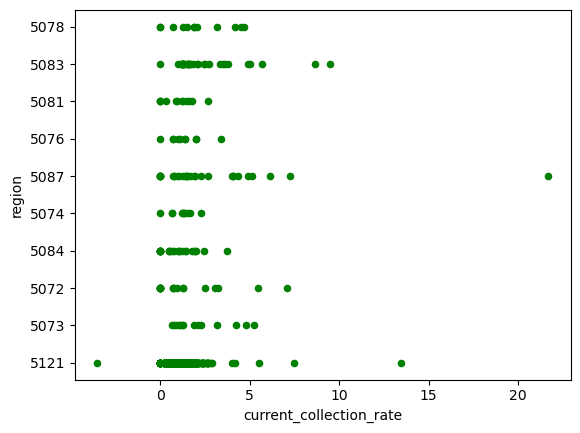

In [46]:
df.plot(x="current_collection_rate", y="region", kind="scatter", c='green');

All the regions have a collection rate of between 0 and 5. Region 5121 and 5087 have customers who have a collection period of over 10 days. 

### Current collection rate by loan type

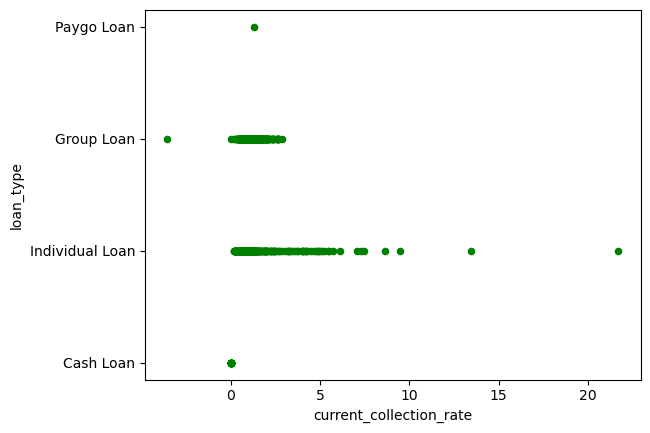

In [47]:
df.plot(x="current_collection_rate", y="loan_type", kind="scatter", c='green');

Group loans have a collection rate of between 0 and 5 days while individual loans have a collection rate of between 0 and 22 days. 
I would recommend issuing more group loans as they have a better collection period. 

### Payment progression by gender

#### Current Payment progression by gender

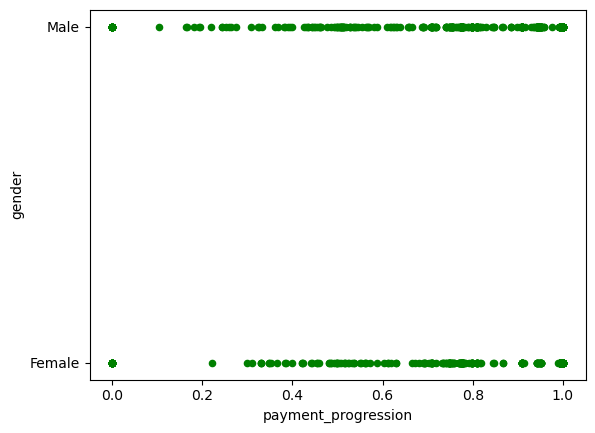

In [48]:
df.plot(x="payment_progression", y="gender", kind="scatter", c='green');

#### Expected Payment progression by gender

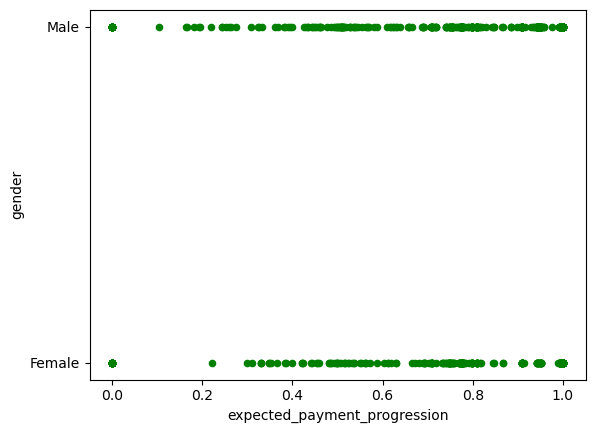

In [49]:
df.plot(x="expected_payment_progression", y="gender", kind="scatter", c='green');

The current and expected payment progression are not that different. 
Men make more consistent loan repayments as compared to women. 

### Payment progression by region

### Current Payment progression by region

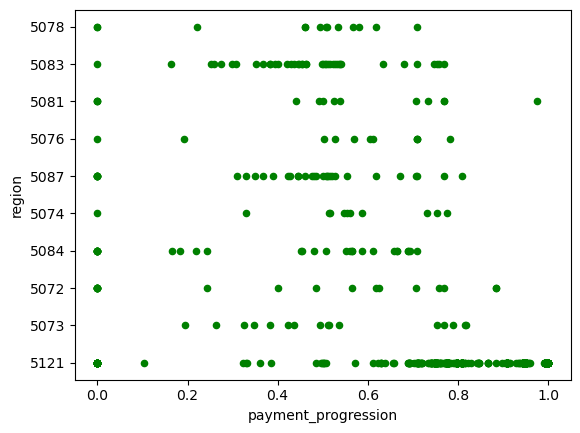

In [50]:
df.plot(x="payment_progression", y="region", kind="scatter", c='green');

### Expected Payment progression by region

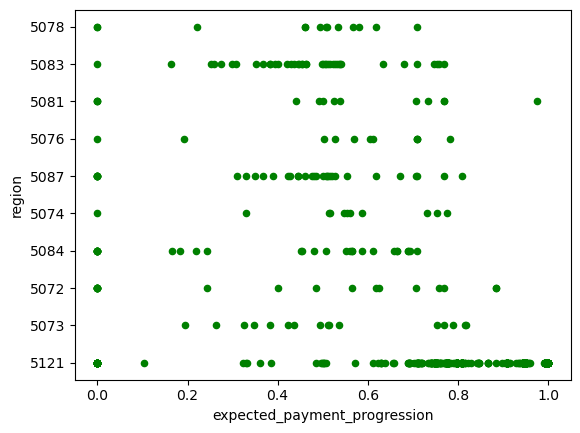

In [51]:
df.plot(x="expected_payment_progression", y="region", kind="scatter", c='green');

The current and expected payment progression are not that different. 
Region 5121 has a payment progression of 0.6 to 1 while the other regions have a payment progression of between 0.2 and 0.8. 
OAF should diversify its loans to different regions to get a better payment progression. 

### Payment progression by loan type

#### Current Payment progression by loan type

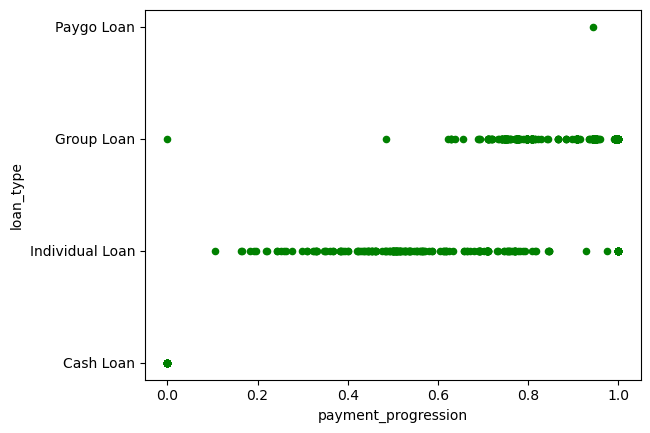

In [52]:
df.plot(x="payment_progression", y="loan_type", kind="scatter", c='green');

#### Expected Payment progression by loan type

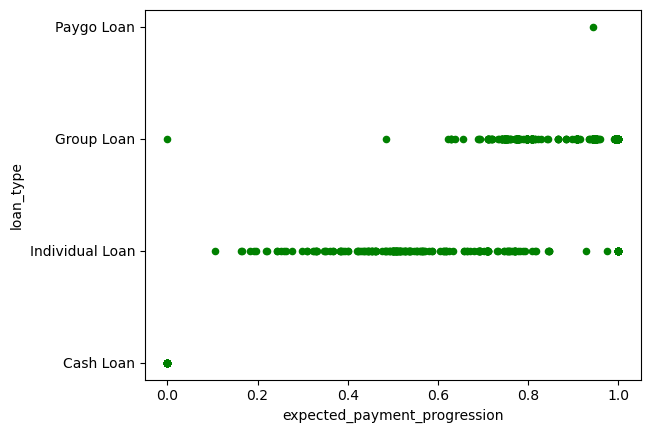

In [53]:
df.plot(x="expected_payment_progression", y="loan_type", kind="scatter", c='green');

The current and expected payment progression are not that different.
Individual loans have a payment progression of between 0.2 and 1 while group loans have a payment progression of between 0.6 and 1. 
Individuals make more consistent loan payments as compared to groups

### Conclusion

Group loans better than individual loans because they have a better collection rate even though the payment progression is concentrated towards the end of the contract. 
Men have a better collection rate and payment progression compared to women. 
OAF should diversify its loans to regions other than 5121 because they have a better payment progression and collection rate. 